In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/Deep Learning/florida_file_.csv' , usecols=[1])
data_set=dataframe.values
data_set=data_set.astype('float32')

In [ ]:
dataframe

,Avg_Temp
0,17.694
1,22.978
2,22.978
3,22.978
4,22.978
...,...
3234,23.576
3235,27.432
3236,27.327
3237,28.188


In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY) #REQUIRED TO BUILD A NEURAL NETWORK

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_set = scaler.fit_transform(data_set)

In [ ]:
# split into train and test sets
train_size = int(len(data_set) * 0.67)# 67 % FOR TRAINING
test_size = len(data_set) - train_size
train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]
print(len(train), len(test))

2170 1069


In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainY

array([0.5651394 , 0.5651394 , 0.5651394 , ..., 0.58401966, 0.74592614,
       0.7446995 ], dtype=float32)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2168/2168 - 5s - loss: 0.0360 - 5s/epoch - 2ms/step
Epoch 2/100
2168/2168 - 3s - loss: 0.0139 - 3s/epoch - 1ms/step
Epoch 3/100
2168/2168 - 3s - loss: 0.0138 - 3s/epoch - 1ms/step
Epoch 4/100
2168/2168 - 3s - loss: 0.0138 - 3s/epoch - 1ms/step
Epoch 5/100
2168/2168 - 3s - loss: 0.0138 - 3s/epoch - 1ms/step
Epoch 6/100
2168/2168 - 3s - loss: 0.0137 - 3s/epoch - 1ms/step
Epoch 7/100
2168/2168 - 3s - loss: 0.0138 - 3s/epoch - 1ms/step
Epoch 8/100
2168/2168 - 3s - loss: 0.0138 - 3s/epoch - 1ms/step
Epoch 9/100
2168/2168 - 3s - loss: 0.0139 - 3s/epoch - 1ms/step
Epoch 10/100
2168/2168 - 3s - loss: 0.0136 - 3s/epoch - 1ms/step
Epoch 11/100
2168/2168 - 3s - loss: 0.0137 - 3s/epoch - 1ms/step
Epoch 12/100
2168/2168 - 3s - loss: 0.0138 - 3s/epoch - 1ms/step
Epoch 13/100
2168/2168 - 3s - loss: 0.0138 - 3s/epoch - 1ms/step
Epoch 14/100
2168/2168 - 3s - loss: 0.0137 - 3s/epoch - 1ms/step
Epoch 15/100
2168/2168 - 3s - loss: 0.0137 - 3s/epoch - 2ms/step
Epoch 16/100
2168/2168 - 3s - loss

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



34/34 [==============================] - 0s 1ms/step


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.64 RMSE
Test Score: 2.74 RMSE


In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_set)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

34/34 [==============================] - 0s 1ms/step


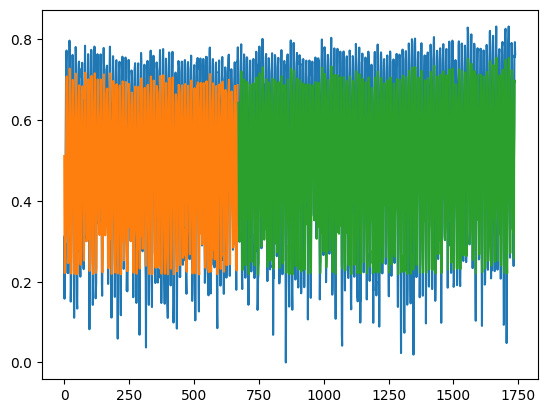

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_set)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data_set)-1, :] = testPredict
# plot baseline and predictions
plt.plot(data_set[1500:])
plt.plot(trainPredictPlot[1500:])
plt.plot(testPredictPlot[1500:])
plt.show()

In [ ]:
len(trainPredict) + (look_back*2)+1

2171